In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv("GOOGL.csv")

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
time_step = 100
X, y = [], []
for i in range(len(scaled_data) - time_step - 1):
  X.append(scaled_data[i:(i + time_step), 0])
  y.append(scaled_data[i + time_step, 0])

X=np.array(X)
y=np.array(y)

In [ ]:
split_ratio= 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

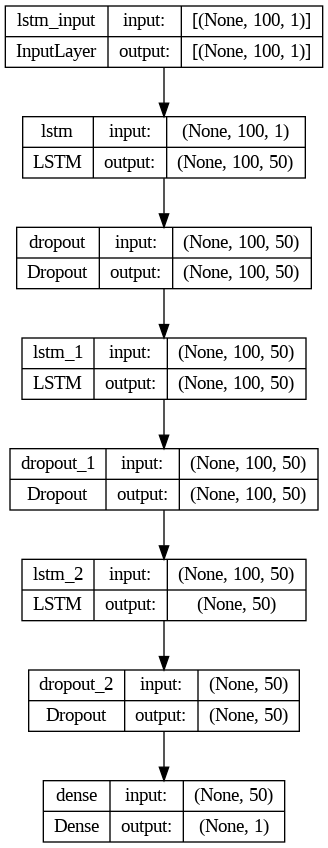

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
109/109 [==============================] - 21s 139ms/step - loss: 0.0012
Epoch 2/5
109/109 [==============================] - 15s 133ms/step - loss: 3.1852e-04
Epoch 3/5
109/109 [==============================] - 17s 156ms/step - loss: 2.4160e-04
Epoch 4/5
109/109 [==============================] - 20s 184ms/step - loss: 2.4536e-04
Epoch 5/5
109/109 [==============================] - 16s 145ms/step - loss: 2.1540e-04


In [ ]:
loss = model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 33ms/step - loss: 0.0020


In [ ]:
predictions = model.predict(X_test)

28/28 [==============================] - 2s 33ms/step


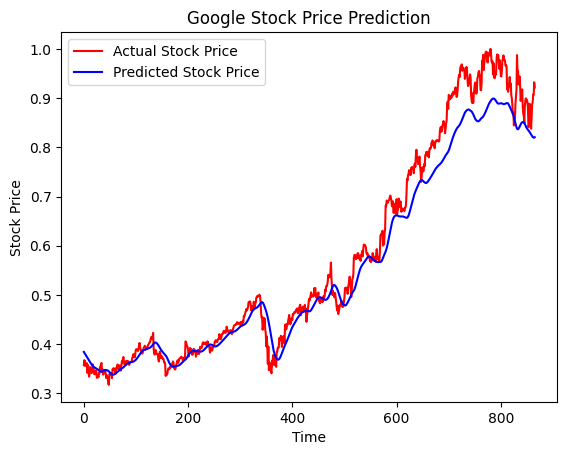

In [ ]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.0443217026002763